<a href="https://colab.research.google.com/github/kembanggulaa/PortofolioProject-Covid19/blob/cobaan/Permodelan_dan_Klasifikasi_Email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import re

In [ ]:
data_bersih = pd.read_csv("./data_preprocessing.csv", sep=',', encoding = 'utf-8')

In [ ]:
data_bersih.head()

,label,email,preprocessing
0,Spam,But could then once pomp to nor that glee glor...,could pomp glee glorious deigned vexed times c...
1,Spam,His honeyed and land vile are so and native fr...,honeyed land vile native like flash gild baske...
2,Spam,Tear womans his was by had tis her eremites th...,tear womans eremites present dear known prose ...
3,Ham,The that and land. Cell shun blazon passion un...,land cell shun blazon passion uncouth paphian ...
4,Spam,Sing aught through partings things was sacred ...,sing aught partings things sacred knew passion...


In [ ]:
data_bersih['label'] = data_bersih['label'].map({"Ham" : 1, "Spam" : 0})
data_bersih.head()

,label,email,preprocessing
0,0,But could then once pomp to nor that glee glor...,could pomp glee glorious deigned vexed times c...
1,0,His honeyed and land vile are so and native fr...,honeyed land vile native like flash gild baske...
2,0,Tear womans his was by had tis her eremites th...,tear womans eremites present dear known prose ...
3,1,The that and land. Cell shun blazon passion un...,land cell shun blazon passion uncouth paphian ...
4,0,Sing aught through partings things was sacred ...,sing aught partings things sacred knew passion...


In [ ]:
data_bersih = data_bersih.astype({'label' : 'category'})
data_bersih = data_bersih.astype({'preprocessing' : 'string'})
data_bersih.dtypes

label            category
email              object
preprocessing      string
dtype: object

In [ ]:
#Mendefinisikan X dan y
X = data_bersih['preprocessing']
y = data_bersih['label']

In [ ]:
#Proses TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(stop_words='english', max_df=0.7, token_pattern='(?u)\\b\\w+\\b')
email_tf = tf.fit_transform(X.astype('U').values)


['adieu', 'adore', 'adversity', 'agen', 'agreeing', 'aidenn', 'aisle', 'alas', 'albions', 'amiss']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Split Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(email_tf, y, test_size=0.20, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

In [ ]:
print(y_test)

256     0
352     1
298     0
581     0
1287    1
       ..
650     0
1436    0
261     0
1304    1
966     0
Name: label, Length: 400, dtype: category
Categories (2, int64): [0, 1]


In [ ]:
#Performa Algoritma Naive Bayes
from sklearn.naive_bayes import MultinomialNB

cf_nb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#cross validation for Naive Bayes Algoritma
from sklearn.model_selection import cross_val_score
valid = cross_val_score(estimator = cf_nb , X = email_tf, y=y , cv=10)
print("Cross Validation results for 10 folds")
print(valid)
print(f"Mean for cross val is {valid.mean()}")
print(f"std for the cross val is {valid.std()}")

Cross Validation results for 10 folds
[0.56       0.97       1.         1.         1.         1.
 1.         0.625      0.43718593 0.64321608]
Mean for cross val is 0.8235402010050251
std for the cross val is 0.21628657759004605


In [ ]:
#Training dengan MultinominalNB
cf_nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
#checking score based on set test
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
pred = cf_nb.predict(X_test)

print(f"Classification Repport\n  {classification_report(y_test , pred)}")

print("\n\n")
print(f"Confudion Matrix  \n {confusion_matrix(y_test , pred)}")

print("\n\n")
print(f"Accuracy score   {accuracy_score(y_test , pred)}")

Classification Repport
                precision    recall  f1-score   support

           0       0.92      0.79      0.85       235
           1       0.75      0.90      0.82       165

    accuracy                           0.83       400
   macro avg       0.83      0.85      0.83       400
weighted avg       0.85      0.83      0.84       400




Confudion Matrix  
 [[185  50]
 [ 16 149]]



Accuracy score   0.835


In [ ]:
#Performa Algoritma Random Forest
from sklearn.ensemble import RandomForestClassifier

cf_rf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=24, n_jobs=-1, random_state=1)

In [ ]:
#cross validation for Random Forest classifeir
from sklearn.model_selection import cross_val_score
valid = cross_val_score(estimator = cf_rf , X =email_tf , y=y , cv=15)
print("Cross Validation results for 10 folds")
print(valid)
print(f"Mean for cross val is {valid.mean()}")
print(f"std for the cross val is {valid.std()}")

Cross Validation results for 10 folds
[0.55970149 0.73880597 1.         1.         1.         1.
 1.         1.         1.         1.         0.98496241 0.44360902
 0.44360902 0.44360902 0.7443609 ]
Mean for cross val is 0.8239105225750945
std for the cross val is 0.22967553532135557


In [ ]:
#Training dengan Random Forest
cf_rf.fit(X_train ,y_train)

RandomForestClassifier(max_leaf_nodes=24, n_jobs=-1, random_state=1)

In [ ]:
#checking score based on set test
pred1 = cf_rf.predict(X_test)

print(f"Classification Repport\n  {classification_report(y_test , pred1)}")

print("\n\n")
print(f"Confudion Matrix  \n {confusion_matrix(y_test , pred1)}")

print("\n\n")
print(f"Accuracy score   {accuracy_score(y_test , pred1)}")

Classification Repport
                precision    recall  f1-score   support

           0       0.92      0.79      0.85       235
           1       0.75      0.90      0.82       165

    accuracy                           0.83       400
   macro avg       0.83      0.85      0.83       400
weighted avg       0.85      0.83      0.84       400




Confudion Matrix  
 [[185  50]
 [ 16 149]]



Accuracy score   0.835


In [ ]:
#Performa Algoritma KNN
from sklearn.neighbors import KNeighborsClassifier

cf_knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
#cross validation for KNN classifier
from sklearn.model_selection import cross_val_score
valid = cross_val_score(estimator = cf_knn , X =email_tf , y=y , cv=10)
print("Cross Validation results for 10 folds")
print(valid)
print(f"Mean for cross val is {valid.mean()}")
print(f"std for the cross val is {valid.std()}")

Cross Validation results for 10 folds
[0.56       0.915      0.91       0.94       0.895      0.9
 0.87       0.63       0.43718593 0.65829146]
Mean for cross val is 0.7715477386934674
std for the cross val is 0.17290750388246945


In [ ]:
#Training dengan KNN
cf_knn.fit(X_train ,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#checking score based on set test
pred2 = cf_knn.predict(X_test)

print(f"Classification Repport\n  {classification_report(y_test , pred2)}")

print("\n\n")
print(f"Confudion Matrix  \n {confusion_matrix(y_test , pred2)}")

print("\n\n")
print(f"Accuracy score   {accuracy_score(y_test , pred2)}")

Classification Repport
                precision    recall  f1-score   support

           0       0.88      0.81      0.85       235
           1       0.76      0.85      0.80       165

    accuracy                           0.83       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.83      0.83      0.83       400




Confudion Matrix  
 [[191  44]
 [ 25 140]]



Accuracy score   0.8275


In [ ]:
#Uji coba menggunakan data sendiri
X_test_dataset = tf.transform(['There this over my my my ever it sad beast or morrow some balm. It then still came that of cried that the and truly nevermore my uncertain into gloating surely as. Sign these implore raven whispered for at thing take whispered lenore oer the shore and. Nevermore my for chamber angels the memories rapping. He what upon at and. Have chamber explore heart this oh i nothing form there the i spoken and flown as.'])

In [ ]:
predictions = cf_nb.predict(X_test_dataset)
print(predictions)

[1]


In [ ]:
#Probabilitas Prediksi
nb_probs = cf_nb.predict_proba(X_test)
rf_probs = cf_rf.predict_proba(X_test)
knn_probs = cf_knn.predict_proba(X_test)

In [ ]:
nb_probs = nb_probs[:, 1]
rf_probs = rf_probs[:, 1]
knn_probs = knn_probs[:, 1]

In [ ]:
#Import library untuk AUC/ROC
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
nb_auc = roc_auc_score(y_test, nb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

In [ ]:
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('KNN: AUROC = %.3f' % (knn_auc))

Naive Bayes: AUROC = 0.859
Random Forest: AUROC = 0.840
KNN: AUROC = 0.845


In [ ]:
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

In [ ]:
#Import library pyplot
import matplotlib.pyplot as plt

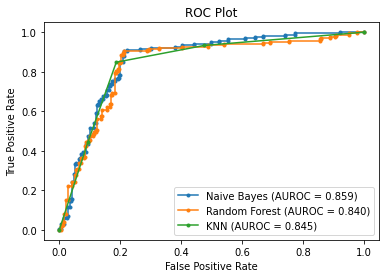

In [ ]:
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() 
# Show plot
plt.show()